In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
mail=pd.read_csv("messages.csv")
mail.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [84]:
# Checking the shape of data set
mail.shape

(2893, 3)

In [85]:
#Information of the database
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


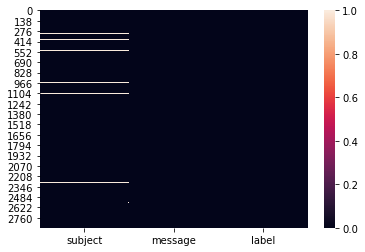

In [86]:
#checking null values using heat map
sns.heatmap(mail.isnull())

In [87]:
mail.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [88]:
#Filling nan values in subject
mail['subject'].fillna("No Subject",inplace=True)

In [89]:
mail.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [90]:
mail.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

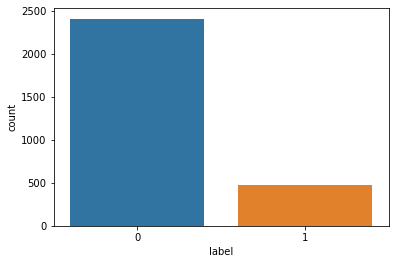

In [91]:
sns.countplot(x='label',data=mail)

plt.show()

In [40]:

#Adding new column for Length of message and subject
mail['Subject Length']= mail.subject.str.len()
mail['Message Length']= mail.message.str.len()
mail.head()

,subject,message,label,Subject Length,Message Length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,39,2856
1,No Subject,"lang classification grimes , joseph e . and ba...",0,10,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046


In [41]:
#Replaceing email address witj 'email'
mail['message'] = mail['message'].str.replace(r'^.=@[^\.].*\.[a-z]{2,}$','emailaddress')
mail['subject'] = mail['subject'].str.replace(r'^.=@[^\.].*\.[a-z]{2,}$','emailaddress')

#Replacing URLs with 'webaddress'
mail['message'] = mail['message'].str.replace(r'^http\://[a-zA=Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
mail['subject'] = mail['subject'].str.replace(r'^http\://[a-zA=Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' 
mail['message'] = mail['message'].str.replace(r'£|\$', 'dollers')
mail['subject'] = mail['subject'].str.replace(r'£|\$', 'dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
mail['message'] = mail['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
mail['subject'] = mail['subject'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replace numbers with 'numbr'
mail['message'] = mail['message'].str.replace(r'\d+(\.\d+)?', 'numbr')
mail['subject'] = mail['subject'].str.replace(r'\d+(\.\d+)?', 'numbr')

mail.head()

,subject,message,label,Subject Length,Message Length
0,job posting - apple-iss research center,content - length : numbr apple-iss research ce...,0,39,2856
1,No Subject,"lang classification grimes , joseph e . and ba...",0,10,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046


In [42]:

#Converting strings to lowercase
mail['message'] = mail['message'].str.lower()
mail['subject'] = mail['subject'].str.lower()

# Remove punctuation
mail['message'] = mail['message'].str.replace(r'[^\w\d\s]', ' ')
mail['subject'] = mail['subject'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
mail['message'] = mail['message'].str.replace(r'\s+', ' ')
mail['subject'] = mail['subject'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
mail['message'] = mail['message'].str.replace(r'^\s+|\s+?$', '')
mail['subject'] = mail['subject'].str.replace(r'^\s+|\s+?$', '')

mail.head()

,subject,message,label,Subject Length,Message Length
0,job posting apple iss research center,content length numbr apple iss research center...,0,39,2856
1,no subject,lang classification grimes joseph e and barbar...,0,10,1800
2,query letter frequencies for text identification,i am posting this inquiry for sergei atamas sa...,0,50,1435
3,risk,a colleague and i are researching the differin...,0,4,324
4,request book information,earlier this morning i was on the phone with a...,0,24,1046


In [43]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
mail['message'] = mail['message'].apply(lambda x: tokenizer.tokenize(x.lower()))
mail['subject'] = mail['subject'].apply(lambda x: tokenizer.tokenize(x.lower()))
mail.head()

,subject,message,label,Subject Length,Message Length
0,"[job, posting, apple, iss, research, center]","[content, length, numbr, apple, iss, research,...",0,39,2856
1,"[no, subject]","[lang, classification, grimes, joseph, e, and,...",0,10,1800
2,"[query, letter, frequencies, for, text, identi...","[i, am, posting, this, inquiry, for, sergei, a...",0,50,1435
3,[risk],"[a, colleague, and, i, are, researching, the, ...",0,4,324
4,"[request, book, information]","[earlier, this, morning, i, was, on, the, phon...",0,24,1046


In [44]:
# Removing stopwords
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english'))
mail['message'] = mail['message'].apply(lambda x:[term for term in x if term not in stop_words])
mail['subject'] = mail['subject'].apply(lambda x:[term for term in x if term not in stop_words])

In [45]:
#Stemming to get root words
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()
mail['message'] = mail['message'].apply(lambda x:' '.join(porter_stemmer.stem(y) for y in x))
mail['subject'] = mail['subject'].apply(lambda x:' '.join(porter_stemmer.stem(y) for y in x))

In [46]:

#Adding new column for Length of  clean message and subject
mail['clean_Subject length'] = mail.subject.str.len()
mail['clean_Message length'] = mail.message.str.len()
mail.head()

,subject,message,label,Subject Length,Message Length,clean_Subject length,clean_Message length
0,job post appl iss research center,content length numbr appl iss research center ...,0,39,2856,33,1822
1,subject,lang classif grime joseph e barbara f grime et...,0,10,1800,7,1289
2,queri letter frequenc text identif,post inquiri sergei atama satama umabnet ab um...,0,50,1435,34,957
3,risk,colleagu research differ degre risk perceiv ho...,0,4,324,4,183
4,request book inform,earlier morn phone friend mine live south amer...,0,24,1046,19,562


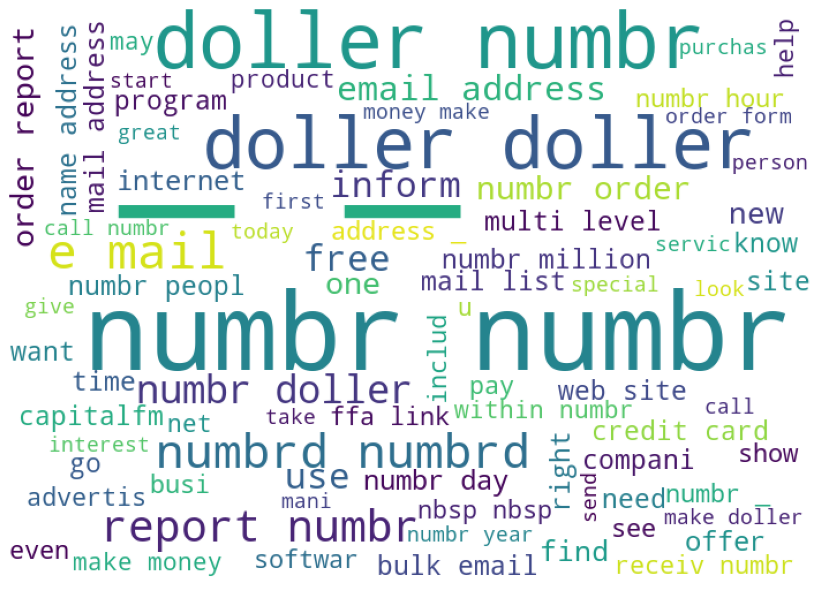

In [49]:
#Getting sense of loud words for spam mails in message
from wordcloud import WordCloud


spam = mail['message'][mail['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=80).generate(' '.join(spam))

plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

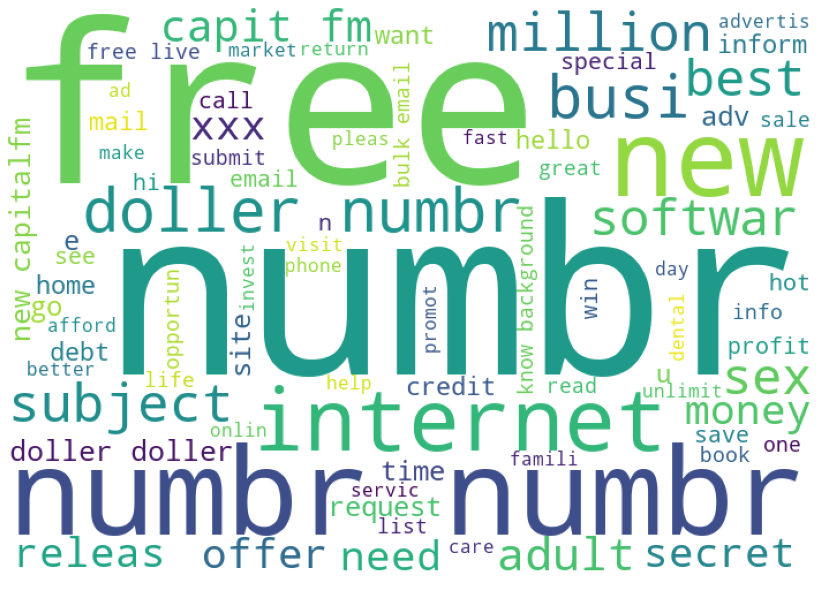

In [50]:

#Getting sense of loud words for spam mails in subject
from wordcloud import WordCloud


spam = mail['subject'][mail['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=80).generate(' '.join(spam))

plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [67]:

#Converting text into vectors using TF-IDF
#Spliting of features and labels
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score, recall_score, classification_report,roc_auc_score,roc_curve,auc

tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(mail['subject'] + mail['message'])

x = features
y = mail['label']


# Loading necessary libraries

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state= 42 ,test_size=0.25)

In [60]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    dtc=DecisionTreeClassifier()
    dtc.fit(train_x,train_y)
    pred=dtc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for DecisionTreeClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for LogisticRegression  ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")


max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    gnb=MultinomialNB()
    gnb.fit(train_x,train_y)
    pred=gnb.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for MultinomialNB", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    knn=KNeighborsClassifier()
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for KNeighborsClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")




max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    ada=AdaBoostClassifier()
    ada.fit(train_x,train_y)
    pred=ada.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for AdaBoostClassifier", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

max_acc_score=0
for i in range(42,101):
    r_state=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state ,test_size=0.30)
    rfc=RandomForestClassifier()
    rfc.fit(train_x,train_y)
    pred=rfc.predict(test_x)
    acc_score=accuracy_score(test_y,pred)
    if acc_score> max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
print("The max accuracy score  for RandomForestClassifier ", max_acc_score,"is achieved at" ,final_r_state)
print("\n")

The max accuracy score  for DecisionTreeClassifier  0.9608294930875576 is achieved at 42


The max accuracy score  for LogisticRegression   0.9688940092165899 is achieved at 98


The max accuracy score  for MultinomialNB 0.8836405529953917 is achieved at 43


The max accuracy score  for KNeighborsClassifier 0.9792626728110599 is achieved at 81


The max accuracy score  for AdaBoostClassifier 0.9919354838709677 is achieved at 54


The max accuracy score  for RandomForestClassifier  0.9827188940092166 is achieved at 84




# Finding Best Parameters by Using GridSearchCV

In [61]:
#Best parameters for LogisticRegression
lg=LogisticRegression()
parameters={"penalty":['l1' ,'l2']  }
gd=GridSearchCV(lg,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")



#Best parameters for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors" :(5,10,15) , 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}
gd=GridSearchCV(knn,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters={"criterion" :("gini" ,"entropy") ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")

#Best parameters for  RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"criterion" :("gini" ,"entropy") , 'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(rfc,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")


#Best parameters for  AdaboostClassifier 
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,20,50,100,120]}
gd=GridSearchCV(ada,parameters)
gd.fit(train_x,train_y)
print(gd.best_params_)
print("\n")






{'penalty': 'l2'}


{'algorithm': 'auto', 'n_neighbors': 10}


{'criterion': 'entropy', 'max_features': 'sqrt'}


{'criterion': 'entropy', 'max_features': 'sqrt'}


{'learning_rate': 1, 'n_estimators': 50}






The model calculation for LogisticRegression(random_state=98) are:
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 

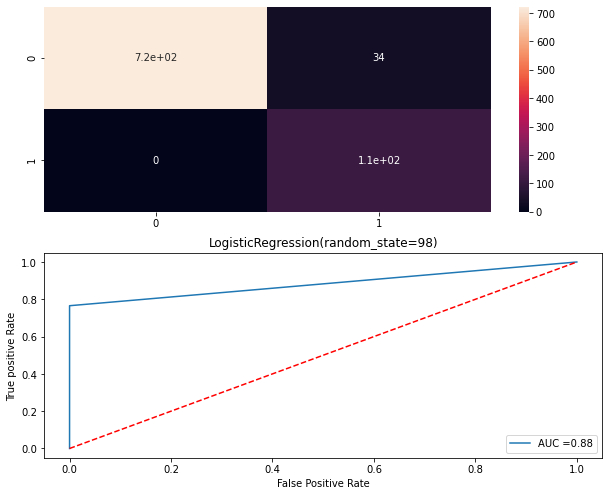

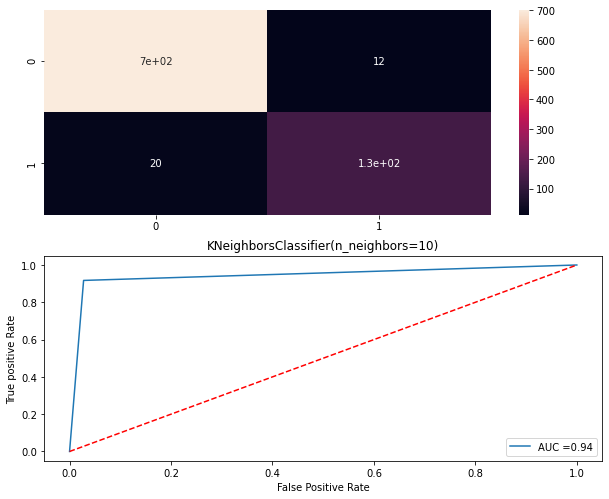

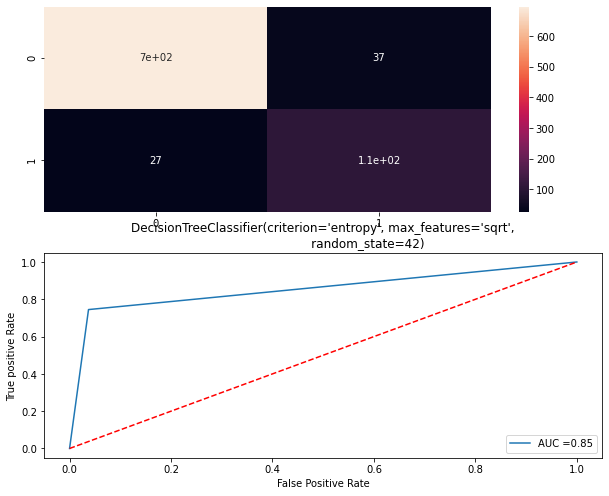

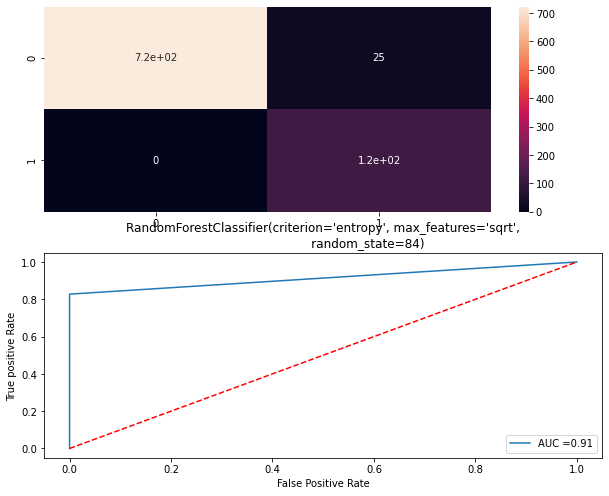

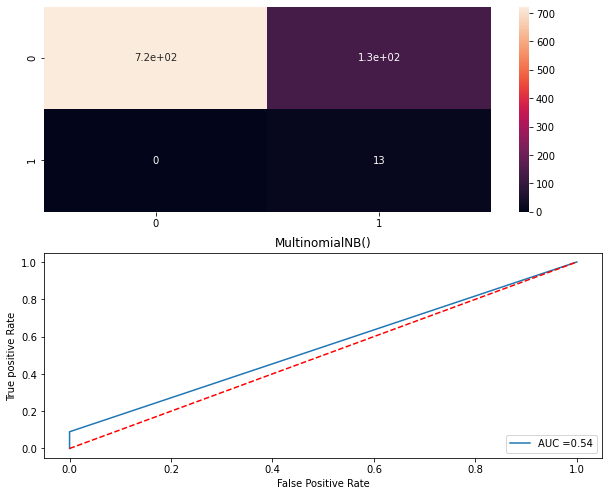

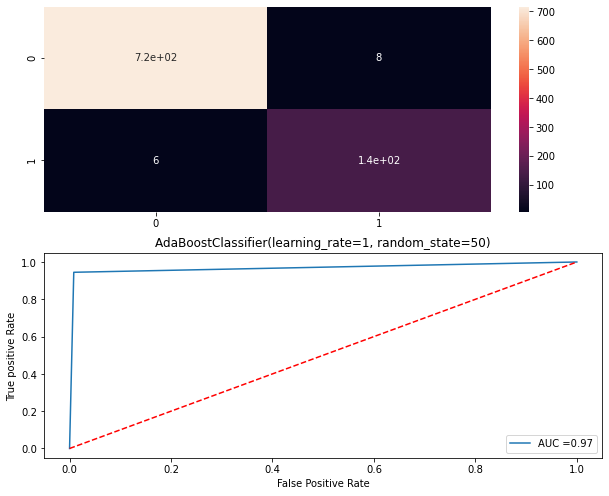

In [68]:
model=[]
score=[]
cvs=[]
rocscore=[]
F1score=[]
Precisionscore=[]
Recallscore=[]

for i in [LogisticRegression(penalty="l2" ,random_state= 98 ),
          KNeighborsClassifier(n_neighbors= 10 , algorithm = 'auto'  ) ,
          DecisionTreeClassifier(criterion ="entropy" , random_state= 42 , max_features = 'sqrt' ),
          RandomForestClassifier(criterion ="entropy" , max_features = 'sqrt' ,random_state= 84 ),
          MultinomialNB( ),
          AdaBoostClassifier( learning_rate = 1, n_estimators = 50 ,random_state= 50)]:
    
          
          
        k=i
        model.append(i)
        print("\n")
        print("The model calculation for" ,i,"are:" )
        k.fit(train_x,train_y)
        k.score(train_x,train_y)
        predict =k.predict(test_x)
        print(predict)
        #-----------Acurracy Score ------------------------------------
        AS=accuracy_score(predict,test_y)
        print("Accuracy Score= " ,AS)
        score.append(AS)
        #-------------Finding Cross Value Score------------------------
        cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
        print("The CV Score is"  ,cv_score)
        cvs.append(cv_score)
        print("")
        #---------------------Confusion Matrix-------------------------
        cm=confusion_matrix(predict,test_y)
        print(cm)
        print("")
        print(classification_report(predict,test_y))
        print("\n")
        #-----------------F1 Score------------------------------------
        F1=f1_score(predict,test_y)
        print("F1 Score= " ,F1)
        F1score.append(F1)
        print("")
        #---------------Precision Score-------------------------------
        precision=precision_score(predict,test_y)
        print("Precision Score= " ,precision)
        Precisionscore.append(precision)
        print("")
        #-----------Recall Score ------------------------------------
        rec=recall_score(predict,test_y)
        print("Recall Score= " ,rec)
        Recallscore.append(rec)
        print("")
        #---------------Roc Auc Score
        false_positive_rate,true_positive_rate,thresholds=roc_curve(test_y,predict)
        roc_auc=auc(false_positive_rate,true_positive_rate)
        print("roc_auc_score" ,roc_auc)
        rocscore.append(roc_auc)
        print("\n")
        plt.figure(figsize=(10,40))
        plt.subplot(911)
        print(sns.heatmap(cm,annot=True))
        plt.subplot(912)
        plt.title(i)
        plt.plot(false_positive_rate,true_positive_rate,label="AUC =%0.2f" %roc_auc)
        plt.plot([0,1] ,[0,1] ,'r--')
        plt.legend(loc="lower right")
        plt.ylabel('True positive Rate')
        plt.xlabel("False Positive Rate")

In [69]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','MultinomialNB','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_Score':F1score,'Precison_Score':Precisionscore,'Recall_Score':Recallscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve,F1_Score,Precison_Score,Recall_Score
0,LogisticRegression,0.960829,0.955758,0.882759,0.867188,0.765517,1.000000
1,KNeighborsClassifier,0.963134,0.961283,0.944789,0.892617,0.917241,0.869281
2,DecisionTreeClassifier,0.926267,0.905633,0.853742,0.771429,0.744828,0.800000
3,RandomForestClassifier,0.971198,0.975805,0.913793,0.905660,0.827586,1.000000
4,MultinomialNB,0.847926,0.847561,0.544828,0.164557,0.089655,1.000000
5,AdaBoostClassifier,0.983871,0.986177,0.968264,0.951389,0.944828,0.958042


# From the above analysis w.r.t Accuracy score, Cross value score ana F1 score AdaBoost Classifier is performing best¶¶


In [74]:
ada=AdaBoostClassifier(learning_rate = 1, n_estimators = 50 ,random_state= 50)
ada.fit(train_x,train_y)
predict=ada.predict(test_x)
AS=accuracy_score(predict,test_y)
print("Accuracy Score=" ,AS)
cv_score=cross_val_score(ada,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score is", cv_score)

Accuracy Score= 0.9838709677419355
The CV Score is 0.986177098087025


In [75]:
#confusion matrix heatmap
conf_mat = confusion_matrix(test_y,predict)
conf_mat

array([[717,   6],
       [  8, 137]], dtype=int64)

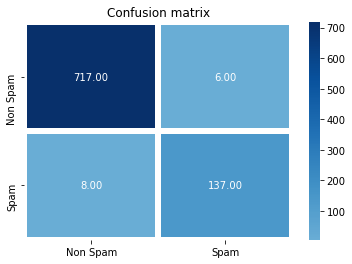

In [76]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(test_y,predict)

ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='white',center=0,cmap=plt.cm.Blues,fmt='.2f')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['Non Spam','Spam'])
ax.yaxis.set_ticklabels(['Non Spam','Spam'])
plt.show()


# ------ We have created system to detect spam emails with 98% accuracy------

# Saving the model

In [80]:

import joblib
joblib.dump(ada,"Spam Detection.pkl")

['Spam Detection.pkl']